In [6]:
import pandas as pd
df=pd.read_csv("breastCancerDataSet.csv")
data=df.loc[:,"radius_mean":"fractal_dimension_worst"]
target=df['diagnosis']

In [7]:
from sklearn.model_selection import train_test_split
XTrain,XTest,yTrain,yTest=train_test_split(data,target,stratify=target)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
neighborsRange=range(1,31)
trainingSetAccuracy=list()
testingSetAccuracy=list()
for k in neighborsRange:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(XTrain,yTrain)
    trainingSetAccuracy.append(knn.score(XTrain,yTrain))
    testingSetAccuracy.append(knn.score(XTest,yTest))

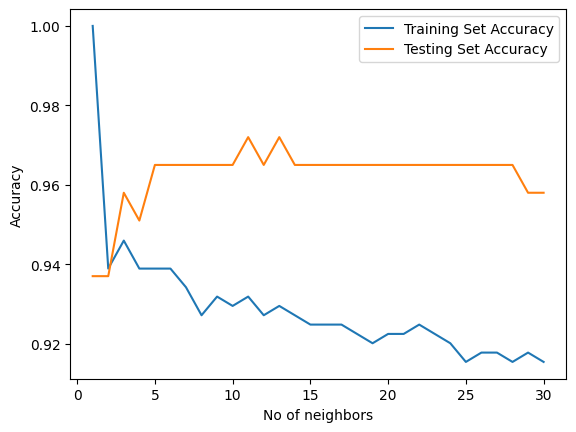

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(neighborsRange,trainingSetAccuracy,label="Training Set Accuracy")
plt.plot(neighborsRange,testingSetAccuracy,label="Testing Set Accuracy")
plt.xlabel("No of neighbors")
plt.ylabel("Accuracy")
plt.legend()

In [12]:
knnFinal=KNeighborsClassifier(n_neighbors=3)
knnFinal.fit(XTrain,yTrain)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [13]:
import pickle
with open("classifier.pkl","wb") as model_file:
    pickle.dump(knnFinal,model_file)